In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt


### Задача 1


Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#Расчет через формулу
cov_zp_ks = np.mean(zp*ks) - np.mean(zp)*np.mean(ks)
print("Значение смещенной ковариации, полученное через формулу:",cov_zp_ks)
#Расчет через функцию
cov_func = np.cov(zp,ks,ddof = 0)
print(cov_func)
print("Несмещенная ковариация расчитанная через функцию",cov_func[0,1])

#Расчет коэффициента корреляции Пирсона через ковариацию и среднеквадратичные отклонения
sigma_zp = np.std(zp,ddof = 0)
sigma_ks = np.std(ks,ddof = 0)
pearson_calc = cov_zp_ks/(sigma_zp*sigma_ks)
print("Коэффициент корреляции Пирсона расчитанный через формулу:",pearson_calc)

#Расчет коэффициента корреляции Пирсона через функцию scipy.stats.pearsonr
pearson_func = st.pearsonr(zp,ks)
print("Коэффициент корреляции Пирсона через функцию scipy.stats.pearsonr:",pearson_func[0])

#Расчет коэффициента корреляции Пирсона через функцию numpy.corrcoef
pearson_func2 = np.corrcoef(zp,ks)
print("Коэффициент корреляции Пирсона через функцию numpy.corrcoef:",pearson_func2[0,1],"\n")

#Рассчет при помощи pandas
print('Для расчета с помощью библиотеки pandas, создаем фрейм данных из заданных массивов: \n')
data = pd.DataFrame({
    "Заработная плата": zp,
    "Кредитный скоринг":ks
})
print(data)

# Рассчитаем корреляцию между столбцами:
print("Коэффициент корреляции полученный при помощи pandas:",data['Заработная плата'].corr(data['Кредитный скоринг']),"\n")


Значение смещенной ковариации, полученное через формулу: 9157.839999999997
[[ 3494.64  9157.84]
 [ 9157.84 30468.89]]
Несмещенная ковариация расчитанная через функцию 9157.840000000002
Коэффициент корреляции Пирсона расчитанный через формулу: 0.8874900920739158
Коэффициент корреляции Пирсона через функцию scipy.stats.pearsonr: 0.8874900920739164
Коэффициент корреляции Пирсона через функцию numpy.corrcoef: 0.8874900920739163 

Для расчета с помощью библиотеки pandas, создаем фрейм данных из заданных массивов: 

   Заработная плата  Кредитный скоринг
0                35                401
1                45                574
2               190                874
3               200                919
4                40                459
5                70                739
6                54                653
7               150                902
8               120                746
9               110                832
Коэффициент корреляции полученный при помощи pandas: 0.

<function matplotlib.pyplot.show(close=None, block=None)>

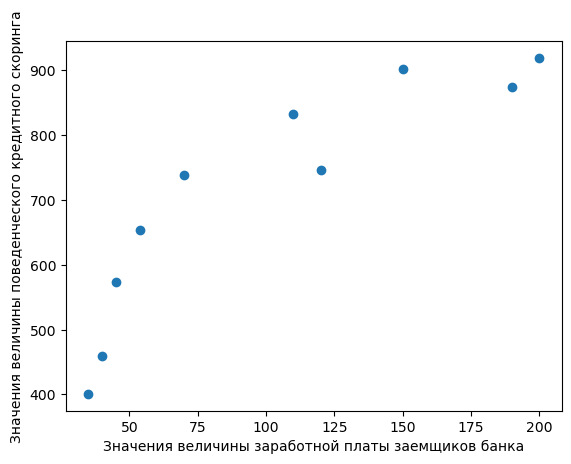

In [3]:
plt.scatter(zp,ks)
plt.xlabel("Значения величины заработной платы заемщиков банка")
plt.ylabel("Значения величины поведенческого кредитного скоринга")
plt.show

## Задача 2

Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [4]:
iq_students = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
p_2 = 0.95 #Доверительная вероятность
#Вычислеяем среднее по выборке
iq_mean = np.mean(iq_students)
print("Среднее значение:",iq_mean)

#Находим несмещенную дисперсию
d_x = np.var(iq_students,ddof = 1)
print("Несмещенная дисперсия:",d_x)

#Находим среднеквадратичное отклонение
sigma_iq = np.sqrt(d_x)
print("Среднеквадратичное отклонение",sigma_iq)

#Находим уровень статистической значимости и t-критерий
alpha_2 = round((1-p_2)/2,4)
t_crit = st.t.ppf(1-alpha_2,len(iq_students)-1)
print("Значение t-критерия:",t_crit)

#Расчитаем границы доверительного интервала
left_2 = round(iq_mean - t_crit*(sigma_iq/np.sqrt(len(iq_students))),4) #Расчитаем левую границу
right_2 = round(iq_mean + t_crit*(sigma_iq/np.sqrt(len(iq_students))),4) #Расчитаем правую границу

interval_2 = [left_2,right_2]
print("Доверительный интервал:",interval_2)

Среднее значение: 118.1
Несмещенная дисперсия: 111.21111111111111
Среднеквадратичное отклонение 10.54566788359614
Значение t-критерия: 2.2621571627409915
Доверительный интервал: [110.5561, 125.6439]


## Задача 3

Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
ожидания с надежностью 0.95.

In [5]:
d_x3 = 25 #Дисперсия генеральной совокупности
n_3 = 27 #Объем выборки
mu_3 = 174.2 #Среднее выборочное
p_3 = 0.95 #Доверительная вероятность

#Известна дисперсия генеральной совокупности - используем z-критерий
alpha_3 = round((1-p_3)/2,4)
z_crit = st.norm.ppf(1-alpha_3)
print("Значение z-критерия",z_crit)

#Вычисляем срднеквадратичное отклонение
sigma_3 = np.sqrt(d_x3)

#Расчитаем границы доверительного интервала
left_3 = mu_3 - z_crit*(sigma_3/np.sqrt(n_3))
right_3 = mu_3 + z_crit*(sigma_3/np.sqrt(n_3))
interval_3 = [left_3,right_3]
print("Доверительный интервал:",interval_3)

Значение z-критерия 1.959963984540054
Доверительный интервал: [172.3140237765397, 176.08597622346028]
